In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

import sys
import os
sys.path.append('..')

from attack.eval import *
from attack import SamAttacker
from utils import *
from config import *
from segment_anything import sam_model_registry, SamPredictor
from FastSAM.fastsam import FastSAM, FastSAMPrompt

In [2]:
device = 'cuda:7'
samb_model = sam_model_registry["vit_b"](checkpoint=SAM_B_PATH)
samb_model.to(device=device)
samb = SamAttacker(samb_model)

samh_model = sam_model_registry["vit_h"](checkpoint=SAM_H_PATH)
samh_model.to(device=device)
samh = SamAttacker(samh_model)

In [3]:
cossim = torch.nn.CosineSimilarity(dim=-1, eps=1e-6)
cos_sim_b_list_TAP = []
cos_sim_h_list_TAP = []
for imgid in range(1, 201):
    imgpath = f'{SAM_DATASET_PATH}sa_{imgid}.jpg'
    samb.set_clean_cv2_image(imgpath)
    clean_features = samb.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    adv_tap_input = samb.TAP(imgpath)
    adv_tap_cv2 = samb.get_cv2_from_torch(adv_tap_input)

    samb.set_image(adv_tap_cv2)
    adv_features = samb.model.image_encoder.hook_feature_list[-1]
    cos_sim_b = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_b_list_TAP.append(cos_sim_b.item())

    samh.set_clean_cv2_image(imgpath)
    clean_features = samh.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    samh.set_image(adv_tap_cv2)
    adv_features = samh.model.image_encoder.hook_feature_list[-1]
    cos_sim_h = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_h_list_TAP.append(cos_sim_h.item())
    print(f'imgid: {imgid}, cos_sim_b: {cos_sim_b.item()}, cos_sim_h: {cos_sim_h.item()}')
    if imgid % 20 == 0:
        # save the results
        np.save(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_b_list_TAP.npy', cos_sim_b_list_TAP)
        np.save(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_h_list_TAP.npy', cos_sim_h_list_TAP)

TAP: 100%|██████████| 40/40 [00:07<00:00,  5.24it/s, loss=-4.2e+3]


imgid: 1, cos_sim_b: 0.9249829649925232, cos_sim_h: 0.953687310218811


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.24it/s, loss=-4.44e+3]


imgid: 2, cos_sim_b: 0.6902121901512146, cos_sim_h: 0.8216082453727722


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.20it/s, loss=-4.89e+3]


imgid: 3, cos_sim_b: 0.6388506889343262, cos_sim_h: 0.9023249745368958


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.12it/s, loss=-4.88e+3]


imgid: 4, cos_sim_b: 0.6784124374389648, cos_sim_h: 0.8745529651641846


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.18it/s, loss=-2.4e+3]


imgid: 5, cos_sim_b: 0.9701351523399353, cos_sim_h: 0.9796878099441528


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.05it/s, loss=-2.38e+3]


imgid: 6, cos_sim_b: 0.983056366443634, cos_sim_h: 0.9856880903244019


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.09it/s, loss=-2.21e+3]


imgid: 7, cos_sim_b: 0.978767454624176, cos_sim_h: 0.9801958799362183


TAP: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s, loss=-2.22e+3]


imgid: 8, cos_sim_b: 0.9847105145454407, cos_sim_h: 0.9876922369003296


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.96it/s, loss=-4.46e+3]


imgid: 9, cos_sim_b: 0.7331856489181519, cos_sim_h: 0.9159516096115112


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.94it/s, loss=-4.2e+3]


imgid: 10, cos_sim_b: 0.598065972328186, cos_sim_h: 0.7909742593765259


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.99it/s, loss=-3.83e+3]


imgid: 11, cos_sim_b: 0.8007184267044067, cos_sim_h: 0.901283860206604


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.97it/s, loss=-4.16e+3]


imgid: 12, cos_sim_b: 0.827133059501648, cos_sim_h: 0.9133883118629456


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.71e+3]


imgid: 13, cos_sim_b: 0.583880603313446, cos_sim_h: 0.7264215350151062


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.28e+3]


imgid: 14, cos_sim_b: 0.43598175048828125, cos_sim_h: 0.8088184595108032


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=-4.06e+3]


imgid: 15, cos_sim_b: 0.6326791048049927, cos_sim_h: 0.8501605987548828


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-5.24e+3]


imgid: 16, cos_sim_b: 0.6956252455711365, cos_sim_h: 0.9606984853744507


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-3.32e+3]


imgid: 17, cos_sim_b: 0.809992790222168, cos_sim_h: 0.8991748690605164


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=-3.81e+3]


imgid: 18, cos_sim_b: 0.6433894634246826, cos_sim_h: 0.8402957916259766


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.65e+3]


imgid: 19, cos_sim_b: 0.5817909240722656, cos_sim_h: 0.8990223407745361


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-3.98e+3]


imgid: 20, cos_sim_b: 0.8342806100845337, cos_sim_h: 0.947307825088501


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.84e+3]


imgid: 21, cos_sim_b: 0.7240417003631592, cos_sim_h: 0.9327062964439392


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.73e+3]


imgid: 22, cos_sim_b: 0.7742317914962769, cos_sim_h: 0.9333332777023315


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.58e+3]


imgid: 23, cos_sim_b: 0.6115135550498962, cos_sim_h: 0.8241689205169678


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.05e+3]


imgid: 24, cos_sim_b: 0.6587828397750854, cos_sim_h: 0.8570890426635742


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.4e+3]


imgid: 25, cos_sim_b: 0.8521612882614136, cos_sim_h: 0.9357873797416687


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-3.54e+3]


imgid: 26, cos_sim_b: 0.5811483263969421, cos_sim_h: 0.8545181751251221


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.64e+3]


imgid: 27, cos_sim_b: 0.8215936422348022, cos_sim_h: 0.9492056965827942


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-2.56e+3]


imgid: 28, cos_sim_b: 0.970557689666748, cos_sim_h: 0.9737508296966553


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-2.88e+3]


imgid: 29, cos_sim_b: 0.9243634939193726, cos_sim_h: 0.9588357210159302


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-2.38e+3]


imgid: 30, cos_sim_b: 0.9716176390647888, cos_sim_h: 0.9753175377845764


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-1.15e+3]


imgid: 31, cos_sim_b: 0.99456387758255, cos_sim_h: 0.9944826364517212


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.25e+3]


imgid: 32, cos_sim_b: 0.6678014993667603, cos_sim_h: 0.8545752167701721


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.86e+3]


imgid: 33, cos_sim_b: 0.6655340194702148, cos_sim_h: 0.8901324272155762


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-4.72e+3]


imgid: 34, cos_sim_b: 0.6807971596717834, cos_sim_h: 0.7937279939651489


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-2.12e+3]


imgid: 35, cos_sim_b: 0.9829864501953125, cos_sim_h: 0.9819603562355042


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-5.37e+3]


imgid: 36, cos_sim_b: 0.9016496539115906, cos_sim_h: 0.9547532200813293


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.18e+3]


imgid: 37, cos_sim_b: 0.7401583194732666, cos_sim_h: 0.9032838940620422


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-2.9e+3]


imgid: 38, cos_sim_b: 0.9016562700271606, cos_sim_h: 0.9472619295120239


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-3.59e+3]


imgid: 39, cos_sim_b: 0.8820837140083313, cos_sim_h: 0.919522762298584


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-5.51e+3]


imgid: 40, cos_sim_b: 0.7547449469566345, cos_sim_h: 0.906994640827179


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4e+3]  


imgid: 41, cos_sim_b: 0.7275574207305908, cos_sim_h: 0.8733934760093689


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-4.72e+3]


imgid: 42, cos_sim_b: 0.6582884788513184, cos_sim_h: 0.8586543798446655


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.72e+3]


imgid: 43, cos_sim_b: 0.7560257911682129, cos_sim_h: 0.9350287914276123


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-2.93e+3]


imgid: 44, cos_sim_b: 0.9210389852523804, cos_sim_h: 0.9485116004943848


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.56e+3]


imgid: 45, cos_sim_b: 0.5931926965713501, cos_sim_h: 0.7758640050888062


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-4.84e+3]


imgid: 46, cos_sim_b: 0.691673755645752, cos_sim_h: 0.8694264888763428


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s, loss=-4.5e+3]


imgid: 47, cos_sim_b: 0.5137104392051697, cos_sim_h: 0.6928467750549316


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.85e+3]


imgid: 48, cos_sim_b: 0.7443209290504456, cos_sim_h: 0.8876579403877258


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.08e+3]


imgid: 49, cos_sim_b: 0.8335349559783936, cos_sim_h: 0.922429084777832


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-4.88e+3]


imgid: 50, cos_sim_b: 0.6783674955368042, cos_sim_h: 0.8422374725341797


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-5e+3]   


imgid: 51, cos_sim_b: 0.7686324119567871, cos_sim_h: 0.9371246099472046


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-3.89e+3]


imgid: 52, cos_sim_b: 0.7384295463562012, cos_sim_h: 0.8103262186050415


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.98e+3]


imgid: 53, cos_sim_b: 0.8135730028152466, cos_sim_h: 0.9492900371551514


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-5.2e+3] 


imgid: 54, cos_sim_b: 0.7164449691772461, cos_sim_h: 0.8594540953636169


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-3.4e+3]


imgid: 55, cos_sim_b: 0.8095583915710449, cos_sim_h: 0.92473304271698


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.34e+3]


imgid: 56, cos_sim_b: 0.8300362229347229, cos_sim_h: 0.9262847900390625


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-3.44e+3]


imgid: 57, cos_sim_b: 0.8364138603210449, cos_sim_h: 0.9283626079559326


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-4.34e+3]


imgid: 58, cos_sim_b: 0.6373302936553955, cos_sim_h: 0.8226989507675171


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-5.09e+3]


imgid: 59, cos_sim_b: 0.7991386651992798, cos_sim_h: 0.9331765174865723


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-3.9e+3]


imgid: 60, cos_sim_b: 0.80510014295578, cos_sim_h: 0.920930802822113


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.44e+3]


imgid: 61, cos_sim_b: 0.7445076107978821, cos_sim_h: 0.8756994009017944


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-3.85e+3]


imgid: 62, cos_sim_b: 0.7334706783294678, cos_sim_h: 0.8498104810714722


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-2.26e+3]


imgid: 63, cos_sim_b: 0.9843531847000122, cos_sim_h: 0.9837359189987183


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-2.98e+3]


imgid: 64, cos_sim_b: 0.8921533226966858, cos_sim_h: 0.9395477771759033


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.75e+3]


imgid: 65, cos_sim_b: 0.6621147394180298, cos_sim_h: 0.8795226812362671


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.37e+3]


imgid: 66, cos_sim_b: 0.7713662385940552, cos_sim_h: 0.9013137221336365


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-3.32e+3]


imgid: 67, cos_sim_b: 0.8954921960830688, cos_sim_h: 0.9551249742507935


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-2.24e+3]


imgid: 68, cos_sim_b: 0.9523695707321167, cos_sim_h: 0.9668960571289062


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-2.94e+3]


imgid: 69, cos_sim_b: 0.9143905639648438, cos_sim_h: 0.9460006952285767


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-3.49e+3]


imgid: 70, cos_sim_b: 0.9119114279747009, cos_sim_h: 0.9478693008422852


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-2.22e+3]


imgid: 71, cos_sim_b: 0.9891481399536133, cos_sim_h: 0.9912087917327881


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.1e+3]


imgid: 72, cos_sim_b: 0.8057495355606079, cos_sim_h: 0.9038910865783691


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.1e+3]


imgid: 73, cos_sim_b: 0.887671172618866, cos_sim_h: 0.9273433089256287


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-5.16e+3]


imgid: 74, cos_sim_b: 0.924302875995636, cos_sim_h: 0.980738639831543


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.34e+3]


imgid: 75, cos_sim_b: 0.8840012550354004, cos_sim_h: 0.9301471710205078


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-2.3e+3]


imgid: 76, cos_sim_b: 0.9782230854034424, cos_sim_h: 0.9830114841461182


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-2.31e+3]


imgid: 77, cos_sim_b: 0.9750508666038513, cos_sim_h: 0.9742667078971863


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-4.17e+3]


imgid: 78, cos_sim_b: 0.5956501960754395, cos_sim_h: 0.8556338548660278


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.46e+3]


imgid: 79, cos_sim_b: 0.7317808866500854, cos_sim_h: 0.8526386618614197


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-3.01e+3]


imgid: 80, cos_sim_b: 0.9053479433059692, cos_sim_h: 0.9471176266670227


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-4.05e+3]


imgid: 81, cos_sim_b: 0.6099675893783569, cos_sim_h: 0.8297604322433472


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-4.74e+3]


imgid: 82, cos_sim_b: 0.7112345695495605, cos_sim_h: 0.8875009417533875


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.61e+3]


imgid: 83, cos_sim_b: 0.8411766886711121, cos_sim_h: 0.9258706569671631


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.4e+3]


imgid: 84, cos_sim_b: 0.8538047075271606, cos_sim_h: 0.9299947023391724


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.23e+3]


imgid: 85, cos_sim_b: 0.7125454545021057, cos_sim_h: 0.891190767288208


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-2.43e+3]


imgid: 86, cos_sim_b: 0.9693822860717773, cos_sim_h: 0.9657139778137207


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-5.07e+3]


imgid: 87, cos_sim_b: 0.7139441967010498, cos_sim_h: 0.9358210563659668


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-3e+3]  


imgid: 88, cos_sim_b: 0.8852063417434692, cos_sim_h: 0.9572437405586243


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.41e+3]


imgid: 89, cos_sim_b: 0.8861656188964844, cos_sim_h: 0.9604527354240417


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.92e+3]


imgid: 90, cos_sim_b: 0.7319426536560059, cos_sim_h: 0.9041615128517151


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-5.31e+3]


imgid: 91, cos_sim_b: 0.7548291087150574, cos_sim_h: 0.8989609479904175


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-5.52e+3]


imgid: 92, cos_sim_b: 0.6598368883132935, cos_sim_h: 0.909293532371521


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-4.84e+3]


imgid: 93, cos_sim_b: 0.6909970045089722, cos_sim_h: 0.8459319472312927


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.89e+3]


imgid: 94, cos_sim_b: 0.7587252855300903, cos_sim_h: 0.9174092411994934


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.84e+3]


imgid: 95, cos_sim_b: 0.7238869667053223, cos_sim_h: 0.887590765953064


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-2.23e+3]


imgid: 96, cos_sim_b: 0.9867801666259766, cos_sim_h: 0.9855254888534546


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-4.77e+3]


imgid: 97, cos_sim_b: 0.5849481821060181, cos_sim_h: 0.8158804774284363


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.99e+3]


imgid: 98, cos_sim_b: 0.6342463493347168, cos_sim_h: 0.7832287549972534


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.47e+3]


imgid: 99, cos_sim_b: 0.789229691028595, cos_sim_h: 0.938491702079773


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s, loss=-5.23e+3]


imgid: 100, cos_sim_b: 0.6495608687400818, cos_sim_h: 0.854763388633728


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-4.69e+3]


imgid: 101, cos_sim_b: 0.6592535376548767, cos_sim_h: 0.8710572719573975


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-4.73e+3]


imgid: 102, cos_sim_b: 0.7634207010269165, cos_sim_h: 0.8792627453804016


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-4.02e+3]


imgid: 103, cos_sim_b: 0.8840196132659912, cos_sim_h: 0.9022535085678101


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-4.73e+3]


imgid: 104, cos_sim_b: 0.6252316236495972, cos_sim_h: 0.794233500957489


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-3.54e+3]


imgid: 105, cos_sim_b: 0.861456036567688, cos_sim_h: 0.9158159494400024


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-2.28e+3]


imgid: 106, cos_sim_b: 0.978303074836731, cos_sim_h: 0.9803436994552612


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.11e+3]


imgid: 107, cos_sim_b: 0.8142392635345459, cos_sim_h: 0.9032565355300903


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.19e+3]


imgid: 108, cos_sim_b: 0.8621152639389038, cos_sim_h: 0.9197481870651245


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-3.18e+3]


imgid: 109, cos_sim_b: 0.9114025831222534, cos_sim_h: 0.9567275643348694


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-3.8e+3]


imgid: 110, cos_sim_b: 0.686136782169342, cos_sim_h: 0.8697611093521118


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.69e+3]


imgid: 111, cos_sim_b: 0.6936155557632446, cos_sim_h: 0.7973402738571167


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-5.27e+3]


imgid: 112, cos_sim_b: 0.8175808191299438, cos_sim_h: 0.9558743238449097


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-4.13e+3]


imgid: 113, cos_sim_b: 0.7649351358413696, cos_sim_h: 0.8342252373695374


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-5.79e+3]


imgid: 114, cos_sim_b: 0.7052624821662903, cos_sim_h: 0.9622557163238525


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-4.2e+3]


imgid: 115, cos_sim_b: 0.7695133686065674, cos_sim_h: 0.9194754362106323


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.79e+3]


imgid: 116, cos_sim_b: 0.7665965557098389, cos_sim_h: 0.9586338996887207


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-2.18e+3]


imgid: 117, cos_sim_b: 0.9833745956420898, cos_sim_h: 0.9859366416931152


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-4.47e+3]


imgid: 118, cos_sim_b: 0.8325049877166748, cos_sim_h: 0.9450284838676453


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.44e+3]


imgid: 119, cos_sim_b: 0.6795929670333862, cos_sim_h: 0.8577499389648438


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.52e+3]


imgid: 120, cos_sim_b: 0.8755514025688171, cos_sim_h: 0.9443322420120239


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=-2.19e+3]


imgid: 121, cos_sim_b: 0.9848774671554565, cos_sim_h: 0.9862563014030457


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-5.02e+3]


imgid: 122, cos_sim_b: 0.7267582416534424, cos_sim_h: 0.8679264187812805


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-2.51e+3]


imgid: 123, cos_sim_b: 0.9793701767921448, cos_sim_h: 0.9813896417617798


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-2.3e+3]


imgid: 124, cos_sim_b: 0.9729048013687134, cos_sim_h: 0.9719539284706116


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-3.75e+3]


imgid: 125, cos_sim_b: 0.8133014440536499, cos_sim_h: 0.9606459140777588


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-3.82e+3]


imgid: 126, cos_sim_b: 0.8546891808509827, cos_sim_h: 0.9317917227745056


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-3.98e+3]


imgid: 127, cos_sim_b: 0.7952170372009277, cos_sim_h: 0.9317457675933838


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.39e+3]


imgid: 128, cos_sim_b: 0.7206385135650635, cos_sim_h: 0.8281005620956421


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-2.32e+3]


imgid: 129, cos_sim_b: 0.9718426465988159, cos_sim_h: 0.9777976870536804


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-1.45e+3]


imgid: 130, cos_sim_b: 0.9969028830528259, cos_sim_h: 0.9943951368331909


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-3.34e+3]


imgid: 131, cos_sim_b: 0.8471386432647705, cos_sim_h: 0.9112417101860046


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-5.71e+3]


imgid: 132, cos_sim_b: 0.7256594896316528, cos_sim_h: 0.9684051275253296


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.49e+3]


imgid: 133, cos_sim_b: 0.8226447105407715, cos_sim_h: 0.9261091351509094


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-2.95e+3]


imgid: 134, cos_sim_b: 0.9135221242904663, cos_sim_h: 0.9410915970802307


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-5.15e+3]


imgid: 135, cos_sim_b: 0.7415462732315063, cos_sim_h: 0.9386986494064331


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.42e+3]


imgid: 136, cos_sim_b: 0.86387699842453, cos_sim_h: 0.9421872496604919


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-2.48e+3]


imgid: 137, cos_sim_b: 0.9656820893287659, cos_sim_h: 0.9720860719680786


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.47e+3]


imgid: 138, cos_sim_b: 0.6771101951599121, cos_sim_h: 0.8796625733375549


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-4.75e+3]


imgid: 139, cos_sim_b: 0.7061829566955566, cos_sim_h: 0.9124464392662048


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-2.89e+3]


imgid: 140, cos_sim_b: 0.9571775794029236, cos_sim_h: 0.9754624366760254


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.98e+3]


imgid: 141, cos_sim_b: 0.7188359498977661, cos_sim_h: 0.9101651906967163


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.64e+3]


imgid: 142, cos_sim_b: 0.8355258107185364, cos_sim_h: 0.8844754695892334


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-5.23e+3]


imgid: 143, cos_sim_b: 0.8533180356025696, cos_sim_h: 0.9656662344932556


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.72e+3]


imgid: 144, cos_sim_b: 0.6659818887710571, cos_sim_h: 0.88902747631073


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.63e+3]


imgid: 145, cos_sim_b: 0.6934704780578613, cos_sim_h: 0.86612468957901


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-5.25e+3]


imgid: 146, cos_sim_b: 0.741703987121582, cos_sim_h: 0.9407531023025513


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.61e+3]


imgid: 147, cos_sim_b: 0.8688679933547974, cos_sim_h: 0.9239901304244995


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=-4.48e+3]


imgid: 148, cos_sim_b: 0.8028005957603455, cos_sim_h: 0.8945158123970032


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.6e+3]


imgid: 149, cos_sim_b: 0.7463293075561523, cos_sim_h: 0.7917882204055786


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-5.15e+3]


imgid: 150, cos_sim_b: 0.7412169575691223, cos_sim_h: 0.9409449100494385


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.51e+3]


imgid: 151, cos_sim_b: 0.7590075731277466, cos_sim_h: 0.854422926902771


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.85it/s, loss=-4.8e+3] 


imgid: 152, cos_sim_b: 0.7882006168365479, cos_sim_h: 0.8631336092948914


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s, loss=-2.2e+3]


imgid: 153, cos_sim_b: 0.9744396209716797, cos_sim_h: 0.9824604988098145


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.24e+3]


imgid: 154, cos_sim_b: 0.9041225910186768, cos_sim_h: 0.9592030048370361


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-4.1e+3]


imgid: 155, cos_sim_b: 0.8135765194892883, cos_sim_h: 0.9207746982574463


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-4.56e+3]


imgid: 156, cos_sim_b: 0.6577805280685425, cos_sim_h: 0.8543022274971008


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=-5.21e+3]


imgid: 157, cos_sim_b: 0.6666749119758606, cos_sim_h: 0.864898681640625


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.52e+3]


imgid: 158, cos_sim_b: 0.6961698532104492, cos_sim_h: 0.8559191226959229


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-3.99e+3]


imgid: 159, cos_sim_b: 0.7261748313903809, cos_sim_h: 0.863844633102417


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-4.25e+3]


imgid: 160, cos_sim_b: 0.8430688977241516, cos_sim_h: 0.923918604850769


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-4.63e+3]


imgid: 161, cos_sim_b: 0.795926570892334, cos_sim_h: 0.9139026403427124


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-3.4e+3]


imgid: 162, cos_sim_b: 0.8426535129547119, cos_sim_h: 0.8977410793304443


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=-4.51e+3]


imgid: 163, cos_sim_b: 0.755059540271759, cos_sim_h: 0.9110289812088013


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-2.31e+3]


imgid: 164, cos_sim_b: 0.9607937335968018, cos_sim_h: 0.9742227792739868


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=-4.95e+3]


imgid: 165, cos_sim_b: 0.836056113243103, cos_sim_h: 0.9517143964767456


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-4.12e+3]


imgid: 166, cos_sim_b: 0.8213731050491333, cos_sim_h: 0.865976095199585


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.73e+3]


imgid: 167, cos_sim_b: 0.8840246200561523, cos_sim_h: 0.9438734650611877


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.39e+3]


imgid: 168, cos_sim_b: 0.8647831678390503, cos_sim_h: 0.9124974012374878


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-2.18e+3]


imgid: 169, cos_sim_b: 0.9876342415809631, cos_sim_h: 0.9906261563301086


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=-1.47e+3]


imgid: 170, cos_sim_b: 0.9964689612388611, cos_sim_h: 0.9932217001914978


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.67e+3]


imgid: 171, cos_sim_b: 0.8213745355606079, cos_sim_h: 0.9300347566604614


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.31e+3]


imgid: 172, cos_sim_b: 0.806250810623169, cos_sim_h: 0.9258912801742554


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.12e+3]


imgid: 173, cos_sim_b: 0.8659462928771973, cos_sim_h: 0.9187617301940918


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.86e+3]


imgid: 174, cos_sim_b: 0.7194222807884216, cos_sim_h: 0.8244150876998901


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-3.41e+3]


imgid: 175, cos_sim_b: 0.892186164855957, cos_sim_h: 0.9468310475349426


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.99e+3]


imgid: 176, cos_sim_b: 0.7704591751098633, cos_sim_h: 0.875474214553833


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-2.34e+3]


imgid: 177, cos_sim_b: 0.9745194315910339, cos_sim_h: 0.9833000302314758


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-4.56e+3]


imgid: 178, cos_sim_b: 0.7781293988227844, cos_sim_h: 0.9057100415229797


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.34e+3]


imgid: 179, cos_sim_b: 0.6813881993293762, cos_sim_h: 0.8732802867889404


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.35e+3]


imgid: 180, cos_sim_b: 0.8186479210853577, cos_sim_h: 0.918410062789917


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.37e+3]


imgid: 181, cos_sim_b: 0.5647071003913879, cos_sim_h: 0.7917572259902954


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=-2.32e+3]


imgid: 182, cos_sim_b: 0.9783493280410767, cos_sim_h: 0.9816880226135254


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.78e+3]


imgid: 183, cos_sim_b: 0.7445857524871826, cos_sim_h: 0.8719481229782104


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-2.81e+3]


imgid: 184, cos_sim_b: 0.9530037045478821, cos_sim_h: 0.9700654745101929


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.83it/s, loss=-4.99e+3]


imgid: 185, cos_sim_b: 0.7046090364456177, cos_sim_h: 0.9206901788711548


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-2.97e+3]


imgid: 186, cos_sim_b: 0.8887773752212524, cos_sim_h: 0.9229168891906738


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-4.41e+3]


imgid: 187, cos_sim_b: 0.6367306113243103, cos_sim_h: 0.7313177585601807


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=-4.53e+3]


imgid: 188, cos_sim_b: 0.6036599278450012, cos_sim_h: 0.7854153513908386


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.41e+3]


imgid: 189, cos_sim_b: 0.8002006411552429, cos_sim_h: 0.9125799536705017


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-3.29e+3]


imgid: 190, cos_sim_b: 0.8655683994293213, cos_sim_h: 0.9029932022094727


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.33e+3]


imgid: 191, cos_sim_b: 0.7997568845748901, cos_sim_h: 0.9099581837654114


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=-4.59e+3]


imgid: 192, cos_sim_b: 0.7326921224594116, cos_sim_h: 0.8255925178527832


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=-4.92e+3]


imgid: 193, cos_sim_b: 0.73117995262146, cos_sim_h: 0.9150972366333008


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-4.79e+3]


imgid: 194, cos_sim_b: 0.8719233274459839, cos_sim_h: 0.9120974540710449


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.88it/s, loss=-3.52e+3]


imgid: 195, cos_sim_b: 0.8317703008651733, cos_sim_h: 0.9035339951515198


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=-5.27e+3]


imgid: 196, cos_sim_b: 0.7572486400604248, cos_sim_h: 0.9454666376113892


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.86it/s, loss=-4.03e+3]


imgid: 197, cos_sim_b: 0.7634501457214355, cos_sim_h: 0.8987852334976196


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=-5.03e+3]


imgid: 198, cos_sim_b: 0.5687160491943359, cos_sim_h: 0.8104437589645386


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-2.24e+3]


imgid: 199, cos_sim_b: 0.9726675748825073, cos_sim_h: 0.975267767906189


TAP: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=-3.04e+3]


imgid: 200, cos_sim_b: 0.8639728426933289, cos_sim_h: 0.9274327754974365


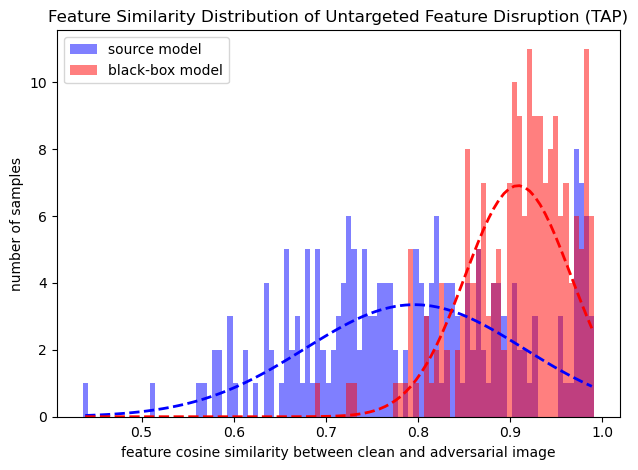

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import norm

#list1 = cos_sim_b_list_TAP
#list2 = cos_sim_h_list_TAP
list1 = np.load(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_b_list_TAP.npy')
list2 = np.load(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_h_list_TAP.npy')

data_min = min(min(list1), min(list2))
data_max = max(max(list1), max(list2))

bin_width = (data_max - data_min) / 100

# 计算每个列表的bins边界，确保bins宽度一致
bins_list1 = np.arange(start=data_min, stop=data_max, step=bin_width)
bins_list2 = np.arange(start=data_min, stop=data_max, step=bin_width)


bins1_midpoints = (bins_list1[:-1] + bins_list1[1:]) / 2
bins2_midpoints = (bins_list2[:-1] + bins_list2[1:]) / 2
pdf1 = norm.pdf(bins1_midpoints, np.mean(list1), np.std(list1))
pdf2 = norm.pdf(bins2_midpoints, np.mean(list2), np.std(list2))

# 绘制直方图，alpha值设置透明度为50%
plt.title('Feature Similarity Distribution of Untargeted Feature Disruption (TAP)')
plt.hist(list1, bins=bins_list1, alpha=0.5, color='blue', label='source model')
plt.hist(list2, bins=bins_list2, alpha=0.5, color='red', label='black-box model')
plt.xlabel('feature cosine similarity between clean and adversarial image')
plt.ylabel('number of samples')

plt.plot(bins1_midpoints, pdf1, 'b--', linewidth=2)
plt.plot(bins2_midpoints, pdf2, 'r--', linewidth=2)
plt.legend()
plt.tight_layout()
plt.savefig(f'{PROJECT_PATH}/exp/feature_distance200/untarget_sim_hist.png')
plt.show()

In [5]:
cossim = torch.nn.CosineSimilarity(dim=-1, eps=1e-6)
cos_sim_b_list_AA = []
cos_sim_h_list_AA = []
for imgid in range(1, 201):
    imgpath = f'{SAM_DATASET_PATH}sa_{imgid}.jpg'
    samb.set_clean_cv2_image(imgpath)
    clean_features = samb.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    adv_AA_input = samb.AA(imgpath)
    adv_AA_cv2 = samb.get_cv2_from_torch(adv_AA_input)

    samb.set_image(adv_AA_cv2)
    adv_features = samb.model.image_encoder.hook_feature_list[-1]
    cos_sim_b = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_b_list_AA.append(cos_sim_b.item())

    samh.set_clean_cv2_image(imgpath)
    clean_features = samh.model.image_encoder.hook_feature_list[-1]
    N, C, H, W = clean_features.shape
    samh.set_image(adv_AA_cv2)
    adv_features = samh.model.image_encoder.hook_feature_list[-1]
    cos_sim_h = cossim(clean_features.reshape(N, C, -1), adv_features.reshape(N, C, -1)).mean()
    cos_sim_h_list_AA.append(cos_sim_h.item())
    print(f'imgid: {imgid}, cos_sim_b: {cos_sim_b.item()}, cos_sim_h: {cos_sim_h.item()}')
    if imgid % 20 == 0:
        # save the results
        np.save(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_b_list_AA.npy', cos_sim_b_list_AA)
        np.save(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_h_list_AA.npy', cos_sim_h_list_AA)

AA: 100%|██████████| 40/40 [00:07<00:00,  5.13it/s, loss=4.57e+3]


imgid: 1, cos_sim_b: 0.9286044239997864, cos_sim_h: 0.9465927481651306


AA: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s, loss=3.59e+3]


imgid: 2, cos_sim_b: 0.7880902290344238, cos_sim_h: 0.8296997547149658


AA: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s, loss=3.76e+3]


imgid: 3, cos_sim_b: 0.846520185470581, cos_sim_h: 0.8757271766662598


AA: 100%|██████████| 40/40 [00:08<00:00,  4.99it/s, loss=3.82e+3]


imgid: 4, cos_sim_b: 0.7359827756881714, cos_sim_h: 0.7857365608215332


AA: 100%|██████████| 40/40 [00:08<00:00,  4.94it/s, loss=3.73e+3]


imgid: 5, cos_sim_b: 0.7998335361480713, cos_sim_h: 0.8481763005256653


AA: 100%|██████████| 40/40 [00:08<00:00,  4.91it/s, loss=3.74e+3]


imgid: 6, cos_sim_b: 0.763710081577301, cos_sim_h: 0.8351781368255615


AA: 100%|██████████| 40/40 [00:08<00:00,  4.89it/s, loss=4.1e+3] 


imgid: 7, cos_sim_b: 0.883560061454773, cos_sim_h: 0.8845621943473816


AA: 100%|██████████| 40/40 [00:08<00:00,  4.87it/s, loss=3.95e+3]


imgid: 8, cos_sim_b: 0.8039082288742065, cos_sim_h: 0.9112159013748169


AA: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=4.23e+3]


imgid: 9, cos_sim_b: 0.8508071899414062, cos_sim_h: 0.9085997939109802


AA: 100%|██████████| 40/40 [00:08<00:00,  4.84it/s, loss=3.52e+3]


imgid: 10, cos_sim_b: 0.7632170915603638, cos_sim_h: 0.8145171403884888


AA: 100%|██████████| 40/40 [00:08<00:00,  4.82it/s, loss=3.91e+3]


imgid: 11, cos_sim_b: 0.8594170808792114, cos_sim_h: 0.9166873693466187


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=4.23e+3]


imgid: 12, cos_sim_b: 0.8898392915725708, cos_sim_h: 0.906792938709259


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=3.66e+3]


imgid: 13, cos_sim_b: 0.7428314685821533, cos_sim_h: 0.7691348195075989


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.3e+3] 


imgid: 14, cos_sim_b: 0.7557843923568726, cos_sim_h: 0.833305299282074


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.86e+3]


imgid: 15, cos_sim_b: 0.8030133247375488, cos_sim_h: 0.883469820022583


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.51e+3]


imgid: 16, cos_sim_b: 0.881016731262207, cos_sim_h: 0.9213804006576538


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.08e+3]


imgid: 17, cos_sim_b: 0.8117007613182068, cos_sim_h: 0.8614742159843445


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.23e+3]


imgid: 18, cos_sim_b: 0.8561781644821167, cos_sim_h: 0.8843023777008057


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.13e+3]


imgid: 19, cos_sim_b: 0.8352353572845459, cos_sim_h: 0.8901686072349548


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.41e+3]


imgid: 20, cos_sim_b: 0.8568748831748962, cos_sim_h: 0.911708652973175


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.98e+3]


imgid: 21, cos_sim_b: 0.8219952583312988, cos_sim_h: 0.8773894906044006


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.08e+3]


imgid: 22, cos_sim_b: 0.8695082664489746, cos_sim_h: 0.9017213582992554


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.54e+3]


imgid: 23, cos_sim_b: 0.8173924684524536, cos_sim_h: 0.8775373101234436


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.37e+3]


imgid: 24, cos_sim_b: 0.8869372606277466, cos_sim_h: 0.9031548500061035


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.08e+3]


imgid: 25, cos_sim_b: 0.9298251867294312, cos_sim_h: 0.9468487501144409


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.95e+3]


imgid: 26, cos_sim_b: 0.775627613067627, cos_sim_h: 0.8723276853561401


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.36e+3]


imgid: 27, cos_sim_b: 0.9002522230148315, cos_sim_h: 0.9388477802276611


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.92e+3]


imgid: 28, cos_sim_b: 0.7601727247238159, cos_sim_h: 0.8255645632743835


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=4.35e+3]


imgid: 29, cos_sim_b: 0.8768144845962524, cos_sim_h: 0.8953031301498413


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.87e+3]


imgid: 30, cos_sim_b: 0.8265798687934875, cos_sim_h: 0.8670428395271301


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.32e+3]


imgid: 31, cos_sim_b: 0.8574343323707581, cos_sim_h: 0.9063034057617188


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.61e+3]


imgid: 32, cos_sim_b: 0.7996178269386292, cos_sim_h: 0.8312844038009644


AA: 100%|██████████| 40/40 [00:08<00:00,  4.75it/s, loss=3.97e+3]


imgid: 33, cos_sim_b: 0.8241366744041443, cos_sim_h: 0.8597068786621094


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.99e+3]


imgid: 34, cos_sim_b: 0.7526684403419495, cos_sim_h: 0.7993466258049011


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.18e+3]


imgid: 35, cos_sim_b: 0.8176631927490234, cos_sim_h: 0.8618617653846741


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.82e+3]


imgid: 36, cos_sim_b: 0.8896918892860413, cos_sim_h: 0.9331297278404236


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.16e+3]


imgid: 37, cos_sim_b: 0.8104926347732544, cos_sim_h: 0.8883152008056641


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.07e+3]


imgid: 38, cos_sim_b: 0.816860556602478, cos_sim_h: 0.8628019690513611


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.71e+3]


imgid: 39, cos_sim_b: 0.8963238000869751, cos_sim_h: 0.8848276138305664


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.49e+3]


imgid: 40, cos_sim_b: 0.8115272521972656, cos_sim_h: 0.8502581119537354


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.01e+3]


imgid: 41, cos_sim_b: 0.6959359049797058, cos_sim_h: 0.7758814096450806


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.87e+3]


imgid: 42, cos_sim_b: 0.6992566585540771, cos_sim_h: 0.7649438381195068


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.41e+3]


imgid: 43, cos_sim_b: 0.8348336219787598, cos_sim_h: 0.9054412841796875


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.18e+3]


imgid: 44, cos_sim_b: 0.8608226776123047, cos_sim_h: 0.897251546382904


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.67e+3]


imgid: 45, cos_sim_b: 0.6398957967758179, cos_sim_h: 0.7001495361328125


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.56e+3]


imgid: 46, cos_sim_b: 0.7209053039550781, cos_sim_h: 0.7971798181533813


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.88e+3]


imgid: 47, cos_sim_b: 0.7763187885284424, cos_sim_h: 0.8458123803138733


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4.18e+3]


imgid: 48, cos_sim_b: 0.765906572341919, cos_sim_h: 0.8097031712532043


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.72e+3]


imgid: 49, cos_sim_b: 0.7971864938735962, cos_sim_h: 0.8312281370162964


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.8e+3] 


imgid: 50, cos_sim_b: 0.7747179269790649, cos_sim_h: 0.7872554063796997


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.54e+3]


imgid: 51, cos_sim_b: 0.8479878902435303, cos_sim_h: 0.9023476839065552


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.88e+3]


imgid: 52, cos_sim_b: 0.8598013520240784, cos_sim_h: 0.8784896731376648


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.83e+3]


imgid: 53, cos_sim_b: 0.8958306312561035, cos_sim_h: 0.922751247882843


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.84e+3]


imgid: 54, cos_sim_b: 0.7819956541061401, cos_sim_h: 0.8152663707733154


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.16e+3]


imgid: 55, cos_sim_b: 0.7495495676994324, cos_sim_h: 0.8795726299285889


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.04e+3]


imgid: 56, cos_sim_b: 0.8514323234558105, cos_sim_h: 0.9232497215270996


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.79e+3]


imgid: 57, cos_sim_b: 0.8379586935043335, cos_sim_h: 0.9071142077445984


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.26e+3]


imgid: 58, cos_sim_b: 0.8794398307800293, cos_sim_h: 0.8906135559082031


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.18e+3]


imgid: 59, cos_sim_b: 0.8672453165054321, cos_sim_h: 0.9167057275772095


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.41e+3]


imgid: 60, cos_sim_b: 0.8219726085662842, cos_sim_h: 0.869263768196106


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4.52e+3]


imgid: 61, cos_sim_b: 0.849869966506958, cos_sim_h: 0.8547245264053345


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.79e+3]


imgid: 62, cos_sim_b: 0.795173704624176, cos_sim_h: 0.8622627854347229


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.56e+3]


imgid: 63, cos_sim_b: 0.8101581335067749, cos_sim_h: 0.8318767547607422


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.65e+3]


imgid: 64, cos_sim_b: 0.7813571691513062, cos_sim_h: 0.8240771293640137


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.85e+3]


imgid: 65, cos_sim_b: 0.7300094366073608, cos_sim_h: 0.8062375783920288


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.79e+3]


imgid: 66, cos_sim_b: 0.8109489679336548, cos_sim_h: 0.8510812520980835


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.15e+3]


imgid: 67, cos_sim_b: 0.8838226795196533, cos_sim_h: 0.9117827415466309


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.65e+3]


imgid: 68, cos_sim_b: 0.7740446925163269, cos_sim_h: 0.8019713163375854


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.81e+3]


imgid: 69, cos_sim_b: 0.8484993577003479, cos_sim_h: 0.8832776546478271


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.25e+3]


imgid: 70, cos_sim_b: 0.9023116827011108, cos_sim_h: 0.9356322288513184


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.87e+3]


imgid: 71, cos_sim_b: 0.9223096370697021, cos_sim_h: 0.9494880437850952


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.68e+3]


imgid: 72, cos_sim_b: 0.8913478851318359, cos_sim_h: 0.9185404777526855


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.75e+3]


imgid: 73, cos_sim_b: 0.9099652767181396, cos_sim_h: 0.9137008190155029


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=3.51e+3]


imgid: 74, cos_sim_b: 0.959520161151886, cos_sim_h: 0.9699279069900513


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4.44e+3]


imgid: 75, cos_sim_b: 0.8934528827667236, cos_sim_h: 0.907669186592102


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4e+3]   


imgid: 76, cos_sim_b: 0.804405152797699, cos_sim_h: 0.8662815093994141


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=3.72e+3]


imgid: 77, cos_sim_b: 0.7626373767852783, cos_sim_h: 0.822526216506958


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.88e+3]


imgid: 78, cos_sim_b: 0.7528078556060791, cos_sim_h: 0.8249690532684326


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.32e+3]


imgid: 79, cos_sim_b: 0.8421221375465393, cos_sim_h: 0.8231346011161804


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.88e+3]


imgid: 80, cos_sim_b: 0.7774289846420288, cos_sim_h: 0.8282190561294556


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=3.56e+3]


imgid: 81, cos_sim_b: 0.7877482771873474, cos_sim_h: 0.8406418561935425


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.85e+3]


imgid: 82, cos_sim_b: 0.8703900575637817, cos_sim_h: 0.9042996764183044


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.03e+3]


imgid: 83, cos_sim_b: 0.9323811531066895, cos_sim_h: 0.9198873043060303


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.97e+3]


imgid: 84, cos_sim_b: 0.7969040870666504, cos_sim_h: 0.8646600246429443


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.24e+3]


imgid: 85, cos_sim_b: 0.8335157632827759, cos_sim_h: 0.8936350345611572


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.65e+3]


imgid: 86, cos_sim_b: 0.7475916743278503, cos_sim_h: 0.7859001159667969


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.71e+3]


imgid: 87, cos_sim_b: 0.8551766276359558, cos_sim_h: 0.9105348587036133


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.98e+3]


imgid: 88, cos_sim_b: 0.8224906921386719, cos_sim_h: 0.8696284890174866


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.83e+3]


imgid: 89, cos_sim_b: 0.9461087584495544, cos_sim_h: 0.9585616588592529


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.58e+3]


imgid: 90, cos_sim_b: 0.7839173674583435, cos_sim_h: 0.8528715372085571


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.86e+3]


imgid: 91, cos_sim_b: 0.7842544317245483, cos_sim_h: 0.8291530609130859


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.82e+3]


imgid: 92, cos_sim_b: 0.8176895380020142, cos_sim_h: 0.8700994253158569


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.07e+3]


imgid: 93, cos_sim_b: 0.793643593788147, cos_sim_h: 0.8369773626327515


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.3e+3] 


imgid: 94, cos_sim_b: 0.8908265829086304, cos_sim_h: 0.9147263765335083


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.87e+3]


imgid: 95, cos_sim_b: 0.798990786075592, cos_sim_h: 0.822044849395752


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.69e+3]


imgid: 96, cos_sim_b: 0.9304395914077759, cos_sim_h: 0.9341732263565063


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.83e+3]


imgid: 97, cos_sim_b: 0.6401684284210205, cos_sim_h: 0.771244466304779


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.67e+3]


imgid: 98, cos_sim_b: 0.779710054397583, cos_sim_h: 0.7978570461273193


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.26e+3]


imgid: 99, cos_sim_b: 0.8485451936721802, cos_sim_h: 0.916035532951355


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.62e+3]


imgid: 100, cos_sim_b: 0.7405153512954712, cos_sim_h: 0.8095173835754395


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.58e+3]


imgid: 101, cos_sim_b: 0.8428889513015747, cos_sim_h: 0.8445234298706055


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.76e+3]


imgid: 102, cos_sim_b: 0.789474368095398, cos_sim_h: 0.8642808198928833


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.79e+3]


imgid: 103, cos_sim_b: 0.939056396484375, cos_sim_h: 0.920433521270752


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.34e+3]


imgid: 104, cos_sim_b: 0.7250513434410095, cos_sim_h: 0.7530296444892883


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.27e+3]


imgid: 105, cos_sim_b: 0.8364893794059753, cos_sim_h: 0.8745794892311096


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.2e+3] 


imgid: 106, cos_sim_b: 0.9021251201629639, cos_sim_h: 0.9188612699508667


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.99e+3]


imgid: 107, cos_sim_b: 0.6993383169174194, cos_sim_h: 0.7196589708328247


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.7e+3] 


imgid: 108, cos_sim_b: 0.7203061580657959, cos_sim_h: 0.785590648651123


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4.56e+3]


imgid: 109, cos_sim_b: 0.8594167232513428, cos_sim_h: 0.9126300811767578


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.03e+3]


imgid: 110, cos_sim_b: 0.7684845924377441, cos_sim_h: 0.842242956161499


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.23e+3]


imgid: 111, cos_sim_b: 0.7441195249557495, cos_sim_h: 0.7723429203033447


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.32e+3]


imgid: 112, cos_sim_b: 0.8734963536262512, cos_sim_h: 0.9373345375061035


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.56e+3]


imgid: 113, cos_sim_b: 0.8563371300697327, cos_sim_h: 0.8429110050201416


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.44e+3]


imgid: 114, cos_sim_b: 0.8153042793273926, cos_sim_h: 0.8853644728660583


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.13e+3]


imgid: 115, cos_sim_b: 0.7882258296012878, cos_sim_h: 0.857363760471344


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.36e+3]


imgid: 116, cos_sim_b: 0.9526063799858093, cos_sim_h: 0.9723612070083618


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.4e+3] 


imgid: 117, cos_sim_b: 0.9042532444000244, cos_sim_h: 0.9412104487419128


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.62e+3]


imgid: 118, cos_sim_b: 0.924953818321228, cos_sim_h: 0.9438683986663818


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.88e+3]


imgid: 119, cos_sim_b: 0.7708292007446289, cos_sim_h: 0.7988736033439636


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.49e+3]


imgid: 120, cos_sim_b: 0.8516044616699219, cos_sim_h: 0.9033956527709961


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.03e+3]


imgid: 121, cos_sim_b: 0.88969886302948, cos_sim_h: 0.8899410963058472


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.22e+3]


imgid: 122, cos_sim_b: 0.8016166687011719, cos_sim_h: 0.854623556137085


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.18e+3]


imgid: 123, cos_sim_b: 0.8300065994262695, cos_sim_h: 0.8657281398773193


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.15e+3]


imgid: 124, cos_sim_b: 0.8361200094223022, cos_sim_h: 0.884141206741333


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.6e+3] 


imgid: 125, cos_sim_b: 0.8791176676750183, cos_sim_h: 0.9653998613357544


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.62e+3]


imgid: 126, cos_sim_b: 0.8876574039459229, cos_sim_h: 0.9137714505195618


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.07e+3]


imgid: 127, cos_sim_b: 0.9015477895736694, cos_sim_h: 0.9274735450744629


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.63e+3]


imgid: 128, cos_sim_b: 0.8251222372055054, cos_sim_h: 0.8524155616760254


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.79e+3]


imgid: 129, cos_sim_b: 0.6672248244285583, cos_sim_h: 0.7128041386604309


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.21e+3]


imgid: 130, cos_sim_b: 0.9196610450744629, cos_sim_h: 0.9259172677993774


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.82e+3]


imgid: 131, cos_sim_b: 0.8527655601501465, cos_sim_h: 0.9093734622001648


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.95e+3]


imgid: 132, cos_sim_b: 0.8120805025100708, cos_sim_h: 0.8684287071228027


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.28e+3]


imgid: 133, cos_sim_b: 0.886040210723877, cos_sim_h: 0.9239449501037598


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.76e+3]


imgid: 134, cos_sim_b: 0.8183524012565613, cos_sim_h: 0.8831126689910889


AA: 100%|██████████| 40/40 [00:07<00:00,  5.02it/s, loss=0]


imgid: 135, cos_sim_b: 0.9938164949417114, cos_sim_h: 0.9941757917404175


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.17e+3]


imgid: 136, cos_sim_b: 0.8234893083572388, cos_sim_h: 0.9066534042358398


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.57e+3]


imgid: 137, cos_sim_b: 0.7620822191238403, cos_sim_h: 0.8274247646331787


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.72e+3]


imgid: 138, cos_sim_b: 0.7957543134689331, cos_sim_h: 0.8483356833457947


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.58e+3]


imgid: 139, cos_sim_b: 0.8058294057846069, cos_sim_h: 0.8572895526885986


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.41e+3]


imgid: 140, cos_sim_b: 0.8836733102798462, cos_sim_h: 0.901628315448761


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.29e+3]


imgid: 141, cos_sim_b: 0.8757069110870361, cos_sim_h: 0.9006994962692261


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.39e+3]


imgid: 142, cos_sim_b: 0.8770334720611572, cos_sim_h: 0.8692115545272827


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.47e+3]


imgid: 143, cos_sim_b: 0.9213956594467163, cos_sim_h: 0.9371767044067383


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.82e+3]


imgid: 144, cos_sim_b: 0.7015835046768188, cos_sim_h: 0.8685601949691772


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.19e+3]


imgid: 145, cos_sim_b: 0.7884529829025269, cos_sim_h: 0.8190979957580566


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.31e+3]


imgid: 146, cos_sim_b: 0.8566495180130005, cos_sim_h: 0.8954378366470337


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.14e+3]


imgid: 147, cos_sim_b: 0.8425413966178894, cos_sim_h: 0.8416192531585693


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.12e+3]


imgid: 148, cos_sim_b: 0.8429074883460999, cos_sim_h: 0.8362501859664917


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.29e+3]


imgid: 149, cos_sim_b: 0.7559928894042969, cos_sim_h: 0.7827099561691284


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.15e+3]


imgid: 150, cos_sim_b: 0.9007697105407715, cos_sim_h: 0.9233829379081726


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.06e+3]


imgid: 151, cos_sim_b: 0.7967361211776733, cos_sim_h: 0.8746852874755859


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.66e+3]


imgid: 152, cos_sim_b: 0.8824211359024048, cos_sim_h: 0.8685058355331421


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.33e+3]


imgid: 153, cos_sim_b: 0.8354479670524597, cos_sim_h: 0.8924137949943542


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.95e+3]


imgid: 154, cos_sim_b: 0.8780189752578735, cos_sim_h: 0.930980920791626


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.23e+3]


imgid: 155, cos_sim_b: 0.8733749389648438, cos_sim_h: 0.9195418357849121


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.74e+3]


imgid: 156, cos_sim_b: 0.8280010223388672, cos_sim_h: 0.8668801188468933


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.87e+3]


imgid: 157, cos_sim_b: 0.7143601179122925, cos_sim_h: 0.760715663433075


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.73e+3]


imgid: 158, cos_sim_b: 0.7900718450546265, cos_sim_h: 0.8188254833221436


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.62e+3]


imgid: 159, cos_sim_b: 0.7504822611808777, cos_sim_h: 0.812630832195282


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.08e+3]


imgid: 160, cos_sim_b: 0.810165524482727, cos_sim_h: 0.8643709421157837


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.82e+3]


imgid: 161, cos_sim_b: 0.7807295322418213, cos_sim_h: 0.8417593240737915


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.98e+3]


imgid: 162, cos_sim_b: 0.860838770866394, cos_sim_h: 0.8621094226837158


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=4.2e+3] 


imgid: 163, cos_sim_b: 0.8872803449630737, cos_sim_h: 0.9120203256607056


AA: 100%|██████████| 40/40 [00:08<00:00,  4.81it/s, loss=3.81e+3]


imgid: 164, cos_sim_b: 0.8155772089958191, cos_sim_h: 0.829880952835083


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.48e+3]


imgid: 165, cos_sim_b: 0.8990426063537598, cos_sim_h: 0.9252324104309082


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.65e+3]


imgid: 166, cos_sim_b: 0.846344530582428, cos_sim_h: 0.8159306049346924


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4.32e+3]


imgid: 167, cos_sim_b: 0.9169872999191284, cos_sim_h: 0.9182915687561035


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4.17e+3]


imgid: 168, cos_sim_b: 0.8402205109596252, cos_sim_h: 0.8758002519607544


AA: 100%|██████████| 40/40 [00:08<00:00,  4.80it/s, loss=3.95e+3]


imgid: 169, cos_sim_b: 0.854954719543457, cos_sim_h: 0.910569429397583


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.35e+3]


imgid: 170, cos_sim_b: 0.9131051301956177, cos_sim_h: 0.9230080842971802


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=4.27e+3]


imgid: 171, cos_sim_b: 0.8946179151535034, cos_sim_h: 0.920822024345398


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.86e+3]


imgid: 172, cos_sim_b: 0.9240440726280212, cos_sim_h: 0.913062572479248


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.81e+3]


imgid: 173, cos_sim_b: 0.6993691921234131, cos_sim_h: 0.7606196403503418


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.86e+3]


imgid: 174, cos_sim_b: 0.7450478076934814, cos_sim_h: 0.7810871601104736


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.94e+3]


imgid: 175, cos_sim_b: 0.83535236120224, cos_sim_h: 0.877732515335083


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=4.05e+3]


imgid: 176, cos_sim_b: 0.7928352952003479, cos_sim_h: 0.8225570917129517


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.92e+3]


imgid: 177, cos_sim_b: 0.7249441146850586, cos_sim_h: 0.7961461544036865


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.15e+3]


imgid: 178, cos_sim_b: 0.8059366941452026, cos_sim_h: 0.8311322927474976


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.44e+3]


imgid: 179, cos_sim_b: 0.8146665692329407, cos_sim_h: 0.8593429327011108


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.95e+3]


imgid: 180, cos_sim_b: 0.9200517535209656, cos_sim_h: 0.920626163482666


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.36e+3]


imgid: 181, cos_sim_b: 0.7156429290771484, cos_sim_h: 0.7366037964820862


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=3.31e+3]


imgid: 182, cos_sim_b: 0.9045782089233398, cos_sim_h: 0.9289032220840454


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.47e+3]


imgid: 183, cos_sim_b: 0.7969548106193542, cos_sim_h: 0.8130601644515991


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.31e+3]


imgid: 184, cos_sim_b: 0.8375529646873474, cos_sim_h: 0.9185199737548828


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.09e+3]


imgid: 185, cos_sim_b: 0.8138453960418701, cos_sim_h: 0.8887514472007751


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.71e+3]


imgid: 186, cos_sim_b: 0.7951574325561523, cos_sim_h: 0.834670901298523


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.72e+3]


imgid: 187, cos_sim_b: 0.6572454571723938, cos_sim_h: 0.7163495421409607


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.21e+3]


imgid: 188, cos_sim_b: 0.7832022905349731, cos_sim_h: 0.8178119659423828


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.43e+3]


imgid: 189, cos_sim_b: 0.8257619142532349, cos_sim_h: 0.8511039614677429


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=3.48e+3]


imgid: 190, cos_sim_b: 0.8247328400611877, cos_sim_h: 0.8367587924003601


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.48e+3]


imgid: 191, cos_sim_b: 0.8638178110122681, cos_sim_h: 0.936142086982727


AA: 100%|██████████| 40/40 [00:08<00:00,  4.79it/s, loss=2.97e+3]


imgid: 192, cos_sim_b: 0.8178970813751221, cos_sim_h: 0.8146982192993164


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.03e+3]


imgid: 193, cos_sim_b: 0.7649483680725098, cos_sim_h: 0.8464410305023193


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4.33e+3]


imgid: 194, cos_sim_b: 0.9489012956619263, cos_sim_h: 0.9338937401771545


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.82e+3]


imgid: 195, cos_sim_b: 0.8350809812545776, cos_sim_h: 0.8795315027236938


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.15e+3]


imgid: 196, cos_sim_b: 0.8949692249298096, cos_sim_h: 0.9352971315383911


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=3.91e+3]


imgid: 197, cos_sim_b: 0.849301278591156, cos_sim_h: 0.8983582258224487


AA: 100%|██████████| 40/40 [00:08<00:00,  4.76it/s, loss=3.75e+3]


imgid: 198, cos_sim_b: 0.761179506778717, cos_sim_h: 0.8095910549163818


AA: 100%|██████████| 40/40 [00:08<00:00,  4.77it/s, loss=4.21e+3]


imgid: 199, cos_sim_b: 0.8242608308792114, cos_sim_h: 0.8629003763198853


AA: 100%|██████████| 40/40 [00:08<00:00,  4.78it/s, loss=4e+3]   


imgid: 200, cos_sim_b: 0.7456642389297485, cos_sim_h: 0.8053015470504761


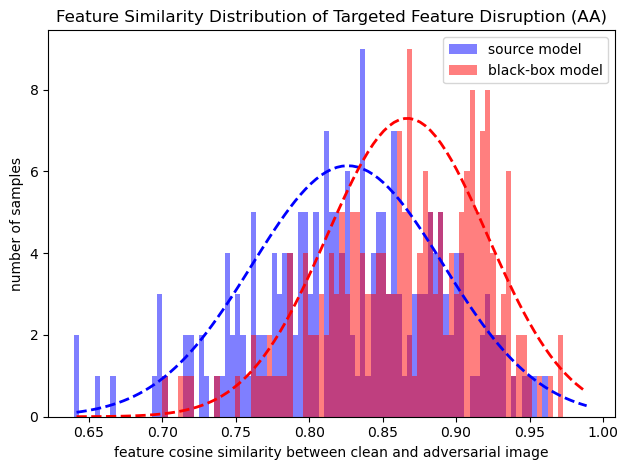

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm

list1 = np.load(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_b_list_AA.npy')
list2 = np.load(f'{PROJECT_PATH}/exp/feature_distance200/cos_sim_h_list_AA.npy')

data_min = min(min(list1), min(list2))
data_max = max(max(list1), max(list2))

bin_width = (data_max - data_min) / 100

# 计算每个列表的bins边界，确保bins宽度一致
bins_list1 = np.arange(start=data_min, stop=data_max, step=bin_width)
bins_list2 = np.arange(start=data_min, stop=data_max, step=bin_width)


bins1_midpoints = (bins_list1[:-1] + bins_list1[1:]) / 2
bins2_midpoints = (bins_list2[:-1] + bins_list2[1:]) / 2
pdf1 = norm.pdf(bins1_midpoints, np.mean(list1), np.std(list1))
pdf2 = norm.pdf(bins2_midpoints, np.mean(list2), np.std(list2))

# 绘制直方图，alpha值设置透明度为50%
plt.title('Feature Similarity Distribution of Targeted Feature Disruption (AA)')
plt.hist(list1, bins=bins_list1, alpha=0.5, color='blue', label='source model')
plt.hist(list2, bins=bins_list2, alpha=0.5, color='red', label='black-box model')
plt.xlabel('feature cosine similarity between clean and adversarial image')
plt.ylabel('number of samples')

plt.plot(bins1_midpoints, pdf1, 'b--', linewidth=2)
plt.plot(bins2_midpoints, pdf2, 'r--', linewidth=2)
plt.legend()
plt.tight_layout()
plt.savefig(f'{PROJECT_PATH}/exp/feature_distance200/target_sim_hist.png')
plt.show()